In [9]:
from TransformingCity import TransformingCity, LandUseViewer, PopulationViewer

import numpy as np
import matplotlib.pyplot as plt
import thinkplot

%matplotlib inline
from matplotlib import rc
rc('animation', html='html5')

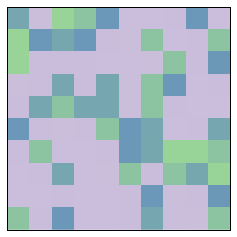

In [10]:
city = TransformingCity(10)
city.array = city.landuse # default array is landuse
viewer = LandUseViewer(city)
anim = viewer.animate()

In [11]:
anim

In [12]:
print(city.array)

[[3 1 6 5 2 1 1 1 2 1]
 [6 2 3 2 1 1 5 1 1 5]
 [6 1 1 1 1 1 1 5 1 2]
 [1 1 3 1 3 1 5 2 1 1]
 [1 3 5 3 3 1 5 1 1 1]
 [2 1 1 1 5 2 3 1 1 3]
 [1 5 1 1 1 2 3 6 6 5]
 [1 1 3 1 1 5 1 5 3 6]
 [1 1 1 1 1 1 2 1 1 2]
 [5 1 2 1 1 1 3 1 1 5]]


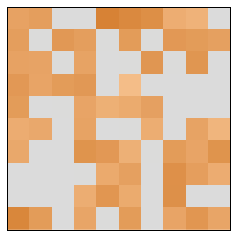

In [13]:
city = TransformingCity(10)
city.step()
city.array = city.pop_count # default array is landuse
viewer = PopulationViewer(city)
anim = viewer.animate()

In [14]:
anim

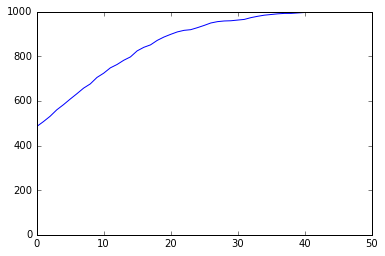

In [15]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7)
for i in range(50):
    city.step()
    
plt.plot(city.displaced_history)
plt.ylim([0, 1000])
plt.show()

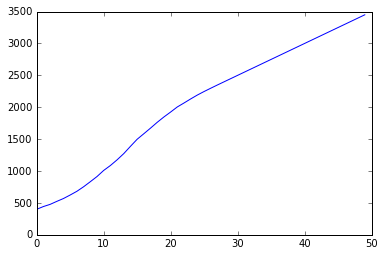

In [17]:
#A smaller city with new agents moving in means that...
#more agents get displaced, because creative density gets EVEN higher.
city = TransformingCity(7)
steps = 50
n_to_add_per_step = 50
for i in range(steps):
    city.step()
    city.add_agents(n_to_add_per_step)
    
plt.plot(city.displaced_history)
plt.ylim([0, 1000 + steps*n_to_add_per_step])
plt.show()